# SA-2022 WEEK 3 GRADED ASSIGNMENT

> Spaceship Titanic

Predict which passengers are transported to an alternate dimension

![](https://www.gannett-cdn.com/-mm-/682bf77435754aee88576469063388a7d8b07c2a/c=0-150-1280-873/local/-/media/2017/02/01/Reno/RGJ/636215634914521096-image001.jpg?width=660&height=373&fit=crop&format=pjpg&auto=webp)


### <b>Description</b>

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

### <b>Data description</b>

- Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- <code>PassengerId</code> - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- <code>HomePlanet</code> - The planet the passenger departed from, typically their planet of permanent residence.
- <code>CryoSleep</code> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- <code>Cabin</code> - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- <code>Destination</code> - The planet the passenger will be debarking to.
- <code>Age</code> - The age of the passenger.
- <code>VIP</code> - Whether the passenger has paid for special VIP service during the voyage.
- <code>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</code> - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- <code>Name</code> - The first and last names of the passenger.
- <code>Transported</code> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


### <b>Algorithm Documentation</b> (Highly recommended!)
- <code>Logistic Regression</code> : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- <code>SVM</code> : https://scikit-learn.org/stable/modules/svm.html
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- <code>Plot Confusion Matrix</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
- <code>ROC_AUC Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
- <code>Classification Report</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- <code>Label Encoder</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- <code>Label Binarizer</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
- <code>Standard Scaler</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- <code>Cross Val Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Install Required Libraries</h1></span>

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

#### Read the data

In [132]:
## ======== YOUR CODE HERE ======== ##

# Use df as the dataframe name throughout the notebook.

df = pd.read_csv('week_3_data.csv')
df.head(25)
df1 =df
df10 =df

## ================================ ##

#### Check the shape of data. It should be  (8693, 14)

In [133]:
## ======== YOUR CODE HERE ======== ##
df.shape


## ================================ ##

(8693, 14)

#### Apply describe on dataframe

In [134]:
## ======== YOUR CODE HERE ======== ##

df.describe
## ================================ ##

<bound method NDFrame.describe of      PassengerId HomePlanet  CryoSleep     Cabin Destination  Age    VIP  \
0        0001_01     Europa      False     B/0/P   Andromeda   39  False   
1        0002_01      Earth      False     F/0/S   Andromeda   24  False   
2        0003_01     Europa      False     A/0/S   Andromeda   58   True   
3        0003_02     Europa      False     A/0/S   Andromeda   33  False   
4        0004_01      Earth      False     F/1/S   Andromeda   16  False   
...          ...        ...        ...       ...         ...  ...    ...   
8688     9276_01     Europa      False    A/98/P       Virgo   41   True   
8689     9278_01      Earth       True  G/1499/S      Cygnus   18  False   
8690     9279_01      Earth      False  G/1500/S   Andromeda   26  False   
8691     9280_01     Europa      False   E/608/S       Virgo   32  False   
8692     9280_02     Europa      False   E/608/S   Andromeda   44  False   

      RoomService  FoodCourt  ShoppingMall   Spa  VRD

#### Check if there any null value in the dataset.

In [135]:
## ======== YOUR CODE HERE ======== ##

value = df.isnull().sum()
value
## ================================ ##

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

#### Number continuous and categorical features

In [136]:
#################################################################

# Don't make mistake here. Ask in the discussion section if you are stuck. Help will be provided....

#################################################################

## ======== YOUR CODE HERE ======== ##

continous_features = ['Age','RoomService','FoodCourt','Spa','VRDeck','ShoppingMall'] # Fill the continuous fearures inside the array
categorical_features = ['HomePlanet','CryoSleep','Destination','VIP','Transported','Name','PassengerId','Cabin'] # Fill the categorical features inside the array

## ======== YOUR CODE HERE ======== ##

print("Continous Features: ", continous_features)
print("No. of Continuous features: ", len(continous_features))

print("Categorical Features: ", categorical_features)
print("No. of Categorical Features: ", len(categorical_features))

Continous Features:  ['Age', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck', 'ShoppingMall']
No. of Continuous features:  6
Categorical Features:  ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Name', 'PassengerId', 'Cabin']
No. of Categorical Features:  8


#### Unique values

In [137]:
from os import X_OK
# Print the number of unique values of the categorical features

## ======== YOUR CODE HERE ======== ##
b = df['HomePlanet'].value_counts()
c = df['CryoSleep'].value_counts()
e = df['Destination'].value_counts()
f = df['VIP'].value_counts()
h = df['Transported'].value_counts()
print(len(b),len(c),len(e),len(f),len(h))


## ======== YOUR CODE HERE ======== ##

3 2 3 2 2


<code>Note: If we apply one-hot-encoding to a categorical feature with many unique values, </code>
- Number of columns will be high
- Time required for training a model will be high
- We may not get usefull insights about the data

<code>This is the reason we are droping the features with more unique values.</code>


#### Drop the features

In [138]:
# Drop those categorical features which have more than 25 unique values



## ======== YOUR CODE HERE ======== ##

drop_cols = df1.columns[df1.nunique() > 25]
df2 = df1.drop(drop_cols, axis=1)

df3 = df1[['Age','RoomService','FoodCourt','Spa','VRDeck','ShoppingMall']].copy()
df4 = pd.concat([df2,df3],axis=1)

df4
## ======== YOUR CODE HERE ======== ##

# Print the shape after droping the features
# Check: Shape --> (8693, 11)

## ======== YOUR CODE HERE ======== ##



## ======== YOUR CODE HERE ======== ##

,HomePlanet,CryoSleep,Destination,VIP,Transported,Age,RoomService,FoodCourt,Spa,VRDeck,ShoppingMall
0,Europa,False,Andromeda,False,False,39,0,0,0,0,0
1,Earth,False,Andromeda,False,True,24,109,9,549,44,25
2,Europa,False,Andromeda,True,False,58,43,3576,6715,49,0
3,Europa,False,Andromeda,False,False,33,0,1283,3329,193,371
4,Earth,False,Andromeda,False,True,16,303,70,565,2,151
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,Virgo,True,False,41,0,6819,1643,74,0
8689,Earth,True,Cygnus,False,False,18,0,0,0,0,0
8690,Earth,False,Andromeda,False,True,26,0,0,1,0,1872
8691,Europa,False,Virgo,False,False,32,0,1049,353,3235,0


#### One Hot Encoding

In [139]:
# Hint: search for get_dummies

## ======== YOUR CODE HERE ======== ##
one_hot_encoded_data = pd.get_dummies(df4, columns = ['HomePlanet','Destination'])
one_hot_encoded_data
# df =pd.concat([df4,one_hot_encoded_data],axis=1)
# df
df = one_hot_encoded_data

## ======== YOUR CODE HERE ======== ##

# Check: Shape --> (8693, 15)

#### Changing bool columns to 0,1

In [140]:
## ======== Run this code(Don't change any code)======== ##

df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['Transported'] = df['Transported'].astype(int)

df

## ======== Run this code(Don't change any code)======== ##


,CryoSleep,VIP,Transported,Age,RoomService,FoodCourt,Spa,VRDeck,ShoppingMall,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Andromeda,Destination_Cygnus,Destination_Virgo
0,0,0,0,39,0,0,0,0,0,0,1,0,1,0,0
1,0,0,1,24,109,9,549,44,25,1,0,0,1,0,0
2,0,1,0,58,43,3576,6715,49,0,0,1,0,1,0,0
3,0,0,0,33,0,1283,3329,193,371,0,1,0,1,0,0
4,0,0,1,16,303,70,565,2,151,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,1,0,41,0,6819,1643,74,0,0,1,0,0,0,1
8689,1,0,0,18,0,0,0,0,0,1,0,0,0,1,0
8690,0,0,1,26,0,0,1,0,1872,1,0,0,1,0,0
8691,0,0,0,32,0,1049,353,3235,0,0,1,0,0,0,1


#### Split the data into train and test

In [141]:
## ======== YOUR CODE HERE ======== ##
import pandas as pd
## Test size should be 15% of the full dataset and use random state = 2022

X = df.drop('Transported' , axis = 'columns')

y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state = 2022)



## ================================ ##

In [142]:
## ======== YOUR CODE HERE ======== ##

   ## Let us print the shapes:

print("X_train:", X_train.shape) # X_train
print("X_test:",X_test.shape) # X_test
print("y_train:",y_train.shape) # y_train
print("y_test:",y_test.shape) # y_test

## ================================ ##

X_train: (7389, 14)
X_test: (1304, 14)
y_train: (7389,)
y_test: (1304,)


#### Scale the data using Standard Scaler

In [143]:
 ## Use Standard Scaler to scale the train and test data

## ======== YOUR CODE HERE ======== ##

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)




## ================================ ##

## <b>Logistic Regression</b>
#### Use default parameters unless mentioned

In [153]:
## Use Random state = 2021 and fit the LR model

## ======== YOUR CODE HERE ======== ##

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scale, y_train)

y_predicted = model.predict(X_test_scale)
y_predicted1 = model.predict_proba(X_test_scale)
model.score(X_test_scale,y_test)


## ================================ ##

0.7906441717791411

#### Plot confusion matrix

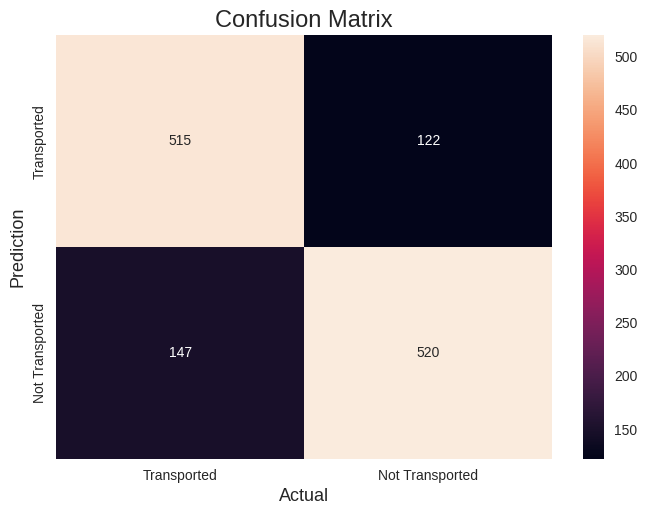

In [145]:
# ## ======== YOUR CODE HERE ======== ##

# #Import the necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


actual = y_test
predicted = y_predicted

cm = confusion_matrix(actual,predicted)


sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['Transported','Not Transported'],
			yticklabels=['Transported','Not Transported'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# ## ================================ ##


#### Print classification report

In [146]:
## ======== YOUR CODE HERE ======== ##
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))
## ================================ ##

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       637
           1       0.81      0.78      0.79       667

    accuracy                           0.79      1304
   macro avg       0.79      0.79      0.79      1304
weighted avg       0.79      0.79      0.79      1304



#### Print accuracy score

In [147]:
## ======== YOUR CODE HERE ======== ##
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

## ================================ ##

0.7937116564417178

#### Print ROC-AUC score

In [148]:
## ======== YOUR CODE HERE ======== ##

## Note: Use predict_proba!!! Read documentation/google it

# y_test_df = y_test.to_frame()
# y_test_df
from sklearn.metrics import roc_auc_score
y_predicted_positive = y_predicted1[:, 1]
roc_auc_score(y_test, y_predicted_positive)



## ================================ ##

0.8778781723737817

#### Plot ROC-AUC Curve

Text(0.5, 1.0, 'ROC curve')

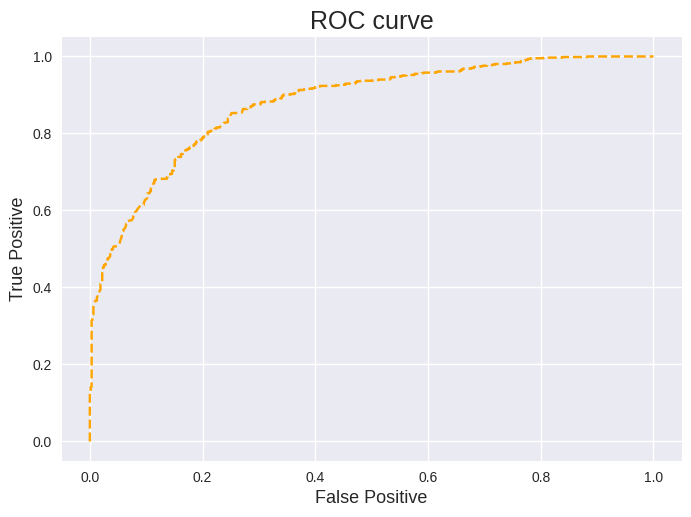

In [149]:
## ======== YOUR CODE HERE ======== ##

## Set appropriate X label, Y label and Title for the graph
# matplotlib
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test,y_predicted1[:, 1], pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.xlabel('False Positive',fontsize=13)
plt.ylabel('True Positive',fontsize=13)
plt.title('ROC curve',fontsize=18)

## ================================ ##

#### Cross validation

In [150]:
## ======== YOUR CODE HERE ======== ##

## cv=5

scores = cross_val_score(model, X, y, cv=5)


print("Cross-Validation Scores:", scores)




## ================================ ##

Cross-Validation Scores: [0.77918344 0.78608396 0.78033353 0.78193326 0.79459148]


## <b>SVM</b>
#### Use default parameters unless mentioned

In [156]:
## ======== YOUR CODE HERE ======== ##

## parameters: random_state = 2022, C=5, gamma='scale', kernel='rbf', probability=True
from sklearn import svm
model1 = svm.SVC(probability = True)
model1.fit(X_train_scale, y_train)

y_predicted_SVM = model1.predict(X_test_scale)
y_predicted_SVM1 = model1.predict_proba(X_test_scale)
model1.score(X_test_scale,y_test)





# from sklearn.svm import SVC

# # Create a new SVM model with probability estimates enabled
# model2 = SVC(probability=True)

# # Train the model
# model2.fit(X_train_scale, y_train)

# # Make predictions and get probability estimates
# y_predicted_SVM = model2.predict(X_test_scale)
# y_predicted_SVM_proba = model2.predict_proba(X_test_scale)

# # Calculate the accuracy score
# accuracy = model2.score(X_test_scale, y_test)


## ================================ ##

0.799079754601227

#### Plot confusion matrix

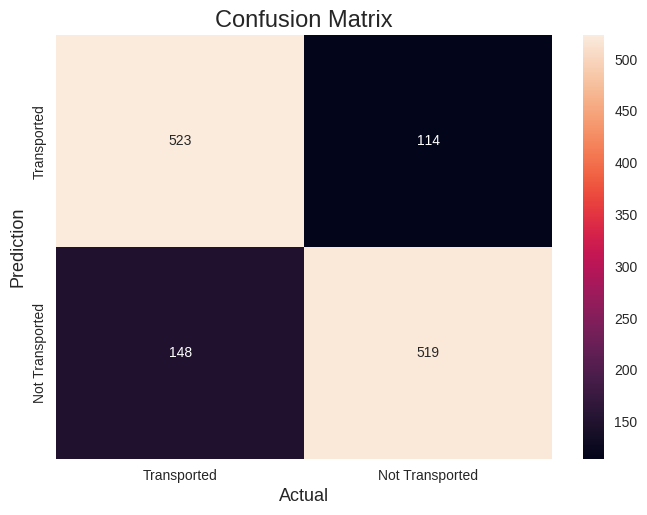

In [157]:
## ======== YOUR CODE HERE ======== ##

## Use display labels as per your choice.

# ## ======== YOUR CODE HERE ======== ##

# #Import the necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


actual = y_test
predicted = y_predicted_SVM

cm = confusion_matrix(actual,predicted)


sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['Transported','Not Transported'],
			yticklabels=['Transported','Not Transported'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# ## ================================ ##



## ================================ ##

#### Print classification report

In [158]:
## ======== YOUR CODE HERE ======== ##

from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted_SVM))

## ================================ ##

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       637
           1       0.82      0.78      0.80       667

    accuracy                           0.80      1304
   macro avg       0.80      0.80      0.80      1304
weighted avg       0.80      0.80      0.80      1304



#### Print accuracy score

In [159]:
## ======== YOUR CODE HERE ======== ##

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted_SVM)


## ================================ ##

0.799079754601227

#### Print ROC-AUC score

In [160]:
## ======== YOUR CODE HERE ======== ##

## Note: Use predict_proba!!! Read documentation/google it
from sklearn.metrics import roc_auc_score
y_predicted_positive = y_predicted_SVM1[:, 1]
roc_auc_score(y_test, y_predicted_positive)


## ================================ ##

0.860189606923383

#### Plot ROC-AUC curve

Text(0.5, 1.0, 'ROC curve')

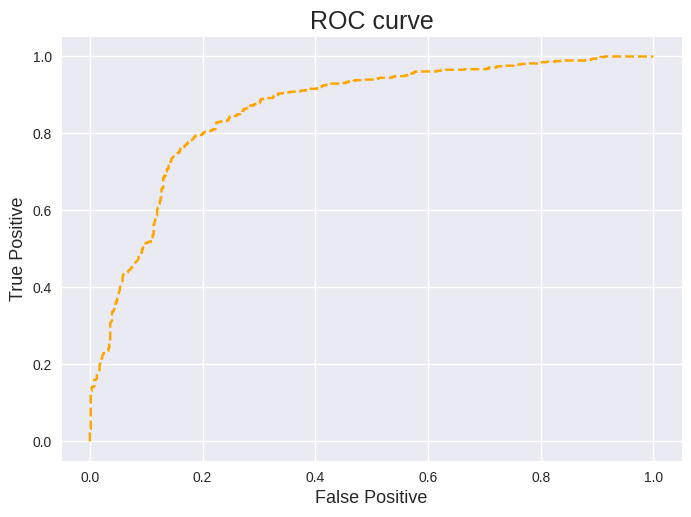

In [161]:
## ======== YOUR CODE HERE ======== ##

## Set appropriate X label, Y label and Title for the graph

from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test,y_predicted_SVM1[:, 1], pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM')
plt.xlabel('False Positive',fontsize=13)
plt.ylabel('True Positive',fontsize=13)
plt.title('ROC curve',fontsize=18)


## ================================ ##

#### Cross validation

In [162]:
## ======== YOUR CODE HERE ======== ##

## cv=5
cores = cross_val_score(model1, X, y, cv=5)


print("Cross-Validation Scores:", scores)




## ================================ ##

Cross-Validation Scores: [0.77918344 0.78608396 0.78033353 0.78193326 0.79459148]


# Congratulations! Assignment Completed!